<a href="https://colab.research.google.com/github/mt508/machine-learning-/blob/main/deeplearning_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris=load_iris(as_frame=True)

In [3]:
X=iris.data[['petal length (cm)','petal width (cm)']].values

In [4]:
Y=(iris.target==0)

In [5]:
per_clf=Perceptron(random_state=42)

In [6]:
per_clf.fit(X,Y)

Perceptron(random_state=42)

In [7]:
per_clf.predict([[2,0.5],[3,1]])

array([ True, False])

In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import numpy as np

In [9]:
housing=fetch_california_housing()
X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)
mlg_reg=MLPRegressor(hidden_layer_sizes=[50,50,50],random_state=42)
Pipeline=make_pipeline(StandardScaler(),mlg_reg)
Pipeline.fit(X_train,y_train)
y_pred=Pipeline.predict(X_valid)
rmse=np.sqrt(mean_squared_error(y_valid,y_pred))
print(rmse)

0.5053326657968684


In [10]:
import tensorflow as tf

In [11]:
fashion_minist= tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
(x_train_full_,y_train_full_),(xtest,ytest)=fashion_minist


In [13]:
x_train_,y_train_=x_train_full_[:-5000],y_train_full_[:-5000]

In [14]:
X_valid_,Y_valid_=x_train_full_[-5000:],y_train_full_[-5000:]

In [15]:
x_train_.shape

(55000, 28, 28)

In [16]:
X_train_,X_valid_,X_test_=x_train_/255.0,X_valid_/255.0,xtest/255.0

In [17]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

In [18]:
class_names[y_train_[0]]

'Ankle boot'

In [19]:
tf.random.set_seed(42)
model=tf.keras.Sequential()

In [20]:
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
hidden1=model.layers[1]

In [23]:
hidden1.name

'dense'

In [24]:
weight,bias=hidden1.get_weights()

In [25]:
weight

array([[-0.05940076, -0.0440918 ,  0.01412822, ..., -0.00958838,
        -0.06479636, -0.01896567],
       [-0.04818257, -0.03562119,  0.03619979, ..., -0.03740172,
        -0.03584251,  0.06979637],
       [-0.05208992,  0.06755753, -0.02722665, ...,  0.07357362,
        -0.06912559,  0.06565899],
       ...,
       [ 0.04234808,  0.01233705, -0.00495445, ...,  0.06208175,
         0.02067579, -0.03489925],
       [-0.00594656,  0.03774504,  0.05986391, ...,  0.03184074,
        -0.06044364, -0.00985132],
       [-0.06281035,  0.03253087, -0.0273716 , ...,  0.00853515,
         0.03792335, -0.01239213]], dtype=float32)

In [26]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [29]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [30]:
history=model.fit(X_train_,y_train_,epochs=30,validation_data=(X_valid_,Y_valid_))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9235 - loss: 0.2187 - val_accuracy: 0.8758 - val_loss: 0.3458
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9249 - loss: 0.2148 - val_accuracy: 0.8772 - val_loss: 0.3462
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9264 - loss: 0.2111 - val_accuracy: 0.8770 - val_loss: 0.3473
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9276 - loss: 0.2074 - val_accuracy: 0.8780 - val_loss: 0.3459
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9287 - loss: 0.2037 - val_accuracy: 0.8782 - val_loss: 0.3457
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9308 - loss: 0.2001 - val_accuracy: 0.8784 - val_loss: 0.3452
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9318 - loss: 0.1967 - val_accuracy: 0.8780 - val_loss: 0.3455
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9328 - loss: 0.1933 -

<Axes: xlabel='Epoch'>

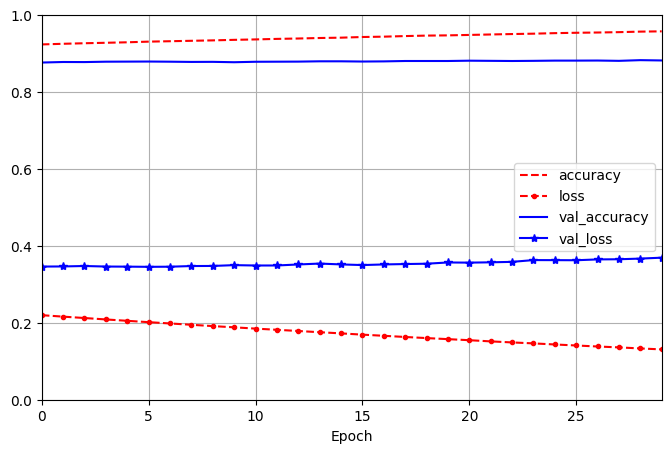

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5),xlim=[0,29],ylim=[0,1], grid=True,xlabel="Epoch",style=['r--','r--.','b-','b-*'])


In [32]:
model.evaluate(X_test_,ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8844 - loss: 0.3853


[0.3820112943649292, 0.8826000094413757]

In [33]:
x_new=X_test_[:3]
y_proba_=model.predict(x_new)
y_proba_.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [34]:
y_pred_=y_proba_.argmax(axis=-1)
y_pred_

array([9, 2, 1])

In [35]:
np.array(class_names)[y_pred_]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [38]:
y_new=ytest[:3]
y_new

array([9, 2, 1], dtype=uint8)